## Imports

In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.6 MB/s eta 0:00:00
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using 

In [2]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Uploading Data

In [16]:
!ls

06-DL_05-Transformers lecture.ipynb
1077-GIS_Analyst_modular.pdf
200113_SCRUM Testfragen.pdf
201809_A346_8-56-28-189B.pdf
201905_A346_8-44-32-213B.pdf
20210112_172651.jpg
20230707140134_TK-Lob & Kritik.pdf
Anaconda3-2023.03-1-Windows-x86_64 (1).exe
Applied-Geospatial-Data-Science-with-Python-BookData.zip
BG0000273.csv
Berlin Data Science April - FT-Tim Reess.pdf
BewerberinmappeSarahRahimi.pdf
Bildungsgutschei.pdf
CV_November_2016.pdf
ChromeSetup.exe
DE5529302.csv
DE6425372.csv
DE6425372_backup.csv
Data Science syllabus EN-komprimiert.pdf
Data Science syllabus EN.pdf
Data-Analyst-Exam-1-Lab-Questions.pdf
Data-Analyst-Exam-1-Lab-Solutions.pdf
Docker Desktop Installer.exe
ESCI-for-Mac-Excel-2011.zip
FontPack2100120135_XtdAlf_Lang_DC.msi
GISGDS_2023_28.pdf
GR4310003.csv
Germany Outcomes Report - 2023.pdf
Git-2.41.0.3-64-bit.exe
GitHubDesktopSetup-x64.exe
Greenshot-INSTALLER-1.2.10.6-RELEASE.exe
ISLP_website.pdf
ISLRv2_corrected_June_2023.pdf
IT5330008.csv
IT7222296.csv
Jupyterlab_Cheat_She

In [4]:
df=pd.read_csv("../raw_data/final_merge/df_model_lc_2015_2024.csv")
df

,Unnamed: 0,SITECODE,date,lon,lat,Bare Ground,Built Area,Crops,Flooded Vegetation,Grass,Shrub and Scrub,Snow and Ice,Trees,Water,temperature_quarterly_mean,precipitation_quarterly_mean,water-vapor-pressure_quarterly_mean,cloud-cover_quarterly_mean
0,0,AT1301000,2015-07-01,16.530699,48.172354,0.004731,0.306967,9.740933,0.434059,3.750812,1.101940,0.000000,79.647261,4.151655,18.86,2.788798e-08,942.75470,0.536892
1,1,AT1302000,2015-07-01,16.224738,48.176358,0.000079,0.450186,1.870178,0.062068,2.485236,0.504686,0.000000,94.372208,0.105224,18.12,3.174909e-08,948.60770,0.553719
2,2,AT1304000,2015-07-01,16.399310,48.313875,0.000000,3.427528,67.818286,0.180076,1.440462,1.265232,0.000000,24.646051,0.000000,18.12,3.174909e-08,948.60770,0.553719
3,3,AT2112000,2015-07-01,13.696092,46.591177,3.268027,0.178362,0.008970,0.550204,0.366961,13.011084,0.232740,82.268944,0.000000,13.15,5.000581e-08,891.69970,0.644521
4,4,AT2116000,2015-07-01,13.503149,46.603491,0.000000,0.845768,8.414334,0.328737,22.908775,0.229168,0.000000,58.175196,7.122431,13.15,5.000581e-08,891.69970,0.644521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,22376,SE0820042,2024-04-01,22.080295,65.631796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.868297,1.987538,0.000000,4.58,2.618655e-08,643.23303,0.658696
22377,22377,SE0820295,2024-04-01,18.212619,67.150809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995652,0.000000,0.000000,0.02,3.101494e-08,562.88360,0.794345
22378,22378,SE0820614,2024-04-01,20.350211,66.053867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.987998,0.000000,0.000000,5.57,2.898485e-08,619.70465,0.720756
22379,22379,SE0820615,2024-04-01,20.949495,66.373559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995901,0.000000,0.000000,6.00,2.736414e-08,622.68720,0.716387


In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df

,SITECODE,date,lon,lat,Bare Ground,Built Area,Crops,Flooded Vegetation,Grass,Shrub and Scrub,Snow and Ice,Trees,Water,temperature_quarterly_mean,precipitation_quarterly_mean,water-vapor-pressure_quarterly_mean,cloud-cover_quarterly_mean
0,AT1301000,2015-07-01,16.530699,48.172354,0.004731,0.306967,9.740933,0.434059,3.750812,1.101940,0.000000,79.647261,4.151655,18.86,2.788798e-08,942.75470,0.536892
1,AT1302000,2015-07-01,16.224738,48.176358,0.000079,0.450186,1.870178,0.062068,2.485236,0.504686,0.000000,94.372208,0.105224,18.12,3.174909e-08,948.60770,0.553719
2,AT1304000,2015-07-01,16.399310,48.313875,0.000000,3.427528,67.818286,0.180076,1.440462,1.265232,0.000000,24.646051,0.000000,18.12,3.174909e-08,948.60770,0.553719
3,AT2112000,2015-07-01,13.696092,46.591177,3.268027,0.178362,0.008970,0.550204,0.366961,13.011084,0.232740,82.268944,0.000000,13.15,5.000581e-08,891.69970,0.644521
4,AT2116000,2015-07-01,13.503149,46.603491,0.000000,0.845768,8.414334,0.328737,22.908775,0.229168,0.000000,58.175196,7.122431,13.15,5.000581e-08,891.69970,0.644521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,SE0820042,2024-04-01,22.080295,65.631796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.868297,1.987538,0.000000,4.58,2.618655e-08,643.23303,0.658696
22377,SE0820295,2024-04-01,18.212619,67.150809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995652,0.000000,0.000000,0.02,3.101494e-08,562.88360,0.794345
22378,SE0820614,2024-04-01,20.350211,66.053867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.987998,0.000000,0.000000,5.57,2.898485e-08,619.70465,0.720756
22379,SE0820615,2024-04-01,20.949495,66.373559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995901,0.000000,0.000000,6.00,2.736414e-08,622.68720,0.716387


In [7]:
df

,SITECODE,date,lon,lat,Bare Ground,Built Area,Crops,Flooded Vegetation,Grass,Shrub and Scrub,Snow and Ice,Trees,Water,temperature_quarterly_mean,precipitation_quarterly_mean,water-vapor-pressure_quarterly_mean,cloud-cover_quarterly_mean
0,AT1301000,2015-07-01,16.530699,48.172354,0.004731,0.306967,9.740933,0.434059,3.750812,1.101940,0.000000,79.647261,4.151655,18.86,2.788798e-08,942.75470,0.536892
1,AT1302000,2015-07-01,16.224738,48.176358,0.000079,0.450186,1.870178,0.062068,2.485236,0.504686,0.000000,94.372208,0.105224,18.12,3.174909e-08,948.60770,0.553719
2,AT1304000,2015-07-01,16.399310,48.313875,0.000000,3.427528,67.818286,0.180076,1.440462,1.265232,0.000000,24.646051,0.000000,18.12,3.174909e-08,948.60770,0.553719
3,AT2112000,2015-07-01,13.696092,46.591177,3.268027,0.178362,0.008970,0.550204,0.366961,13.011084,0.232740,82.268944,0.000000,13.15,5.000581e-08,891.69970,0.644521
4,AT2116000,2015-07-01,13.503149,46.603491,0.000000,0.845768,8.414334,0.328737,22.908775,0.229168,0.000000,58.175196,7.122431,13.15,5.000581e-08,891.69970,0.644521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,SE0820042,2024-04-01,22.080295,65.631796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.868297,1.987538,0.000000,4.58,2.618655e-08,643.23303,0.658696
22377,SE0820295,2024-04-01,18.212619,67.150809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995652,0.000000,0.000000,0.02,3.101494e-08,562.88360,0.794345
22378,SE0820614,2024-04-01,20.350211,66.053867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.987998,0.000000,0.000000,5.57,2.898485e-08,619.70465,0.720756
22379,SE0820615,2024-04-01,20.949495,66.373559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.995901,0.000000,0.000000,6.00,2.736414e-08,622.68720,0.716387


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22381 entries, 0 to 22380
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SITECODE                             22381 non-null  object 
 1   date                                 22381 non-null  object 
 2   lon                                  22381 non-null  float64
 3   lat                                  22381 non-null  float64
 4   Bare Ground                          22381 non-null  float64
 5   Built Area                           22381 non-null  float64
 6   Crops                                22381 non-null  float64
 7   Flooded Vegetation                   22381 non-null  float64
 8   Grass                                22381 non-null  float64
 9   Shrub and Scrub                      22381 non-null  float64
 10  Snow and Ice                         22381 non-null  float64
 11  Trees                       

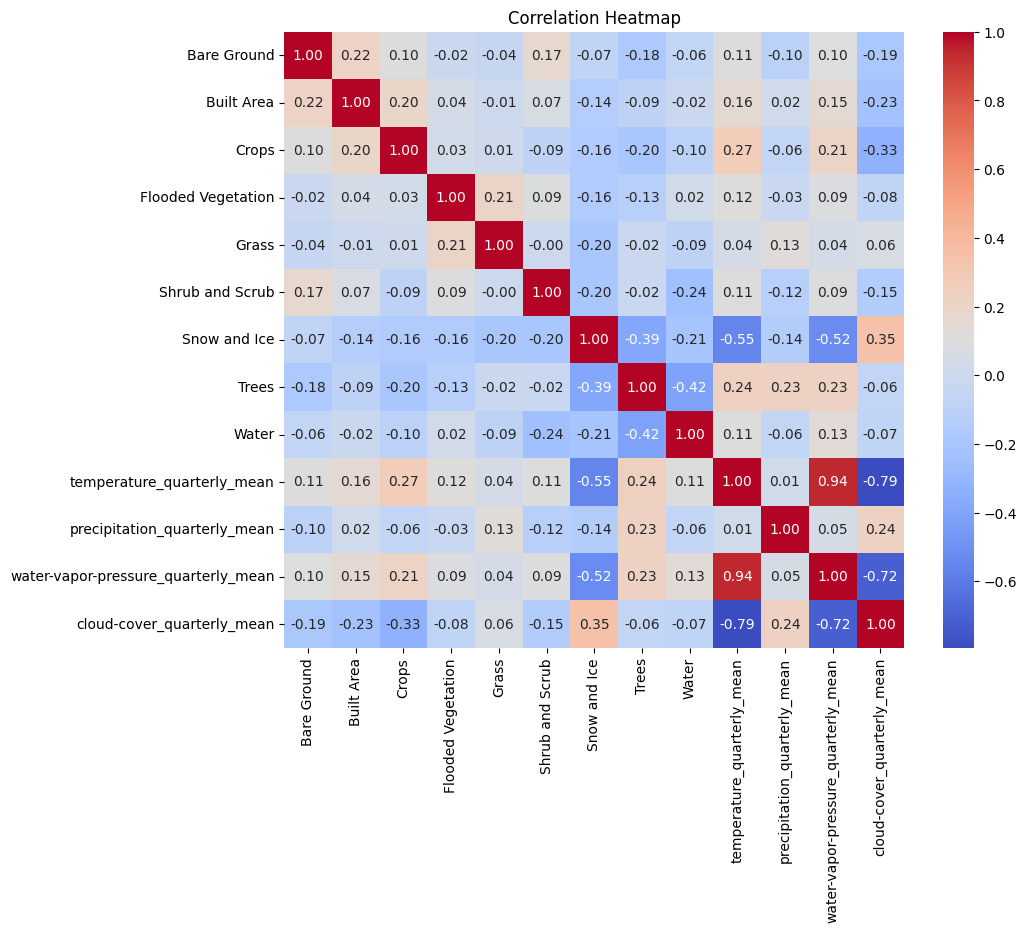

In [9]:
# Drop non-numeric columns
numeric_df = df.drop(['date', 'SITECODE', 'lon', 'lat'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
numeric_df.columns

Index(['Bare Ground', 'Built Area', 'Crops', 'Flooded Vegetation', 'Grass',
       'Shrub and Scrub', 'Snow and Ice', 'Trees', 'Water',
       'temperature_quarterly_mean', 'precipitation_quarterly_mean',
       'water-vapor-pressure_quarterly_mean', 'cloud-cover_quarterly_mean'],
      dtype='object')

<Axes: >

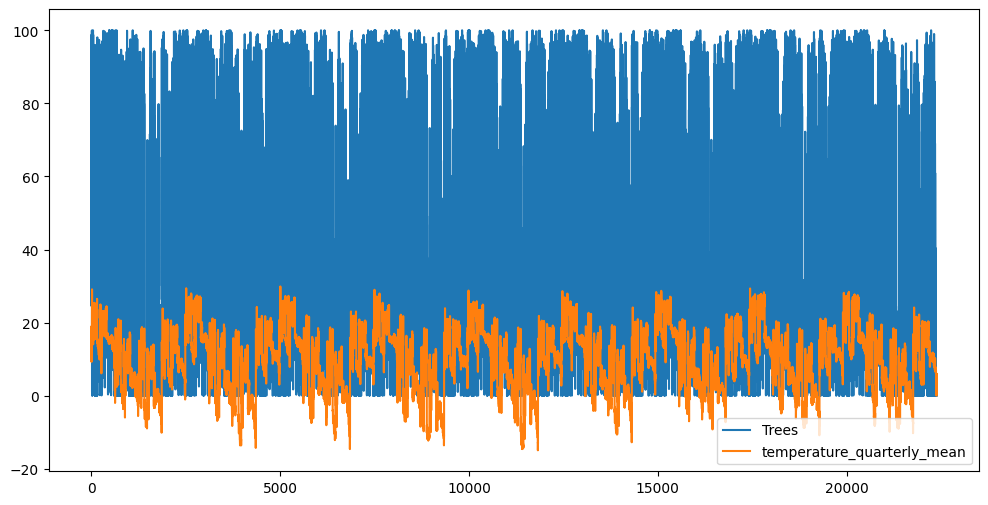

In [11]:
numeric_df[['Trees',
       'temperature_quarterly_mean']].plot(figsize=(12,6))

In [12]:
# Normalize the features
scaler = MinMaxScaler()
features = ['temperature_quarterly_mean', 'precipitation_quarterly_mean', 'water-vapor-pressure_quarterly_mean', 'cloud-cover_quarterly_mean']
df[features] = scaler.fit_transform(df[features])

# Prepare the sequences
site_codes = df['SITECODE'].unique()
sequences = []
targets = []

for site_code in site_codes:
    site_data = df[df['SITECODE'] == site_code].sort_values('date')
    sequences.append(site_data[features].values)
    targets.append(site_data[['Bare Ground', 'Built Area', 'Crops', 'Flooded Vegetation', 'Grass', 'Shrub and Scrub', 'Snow and Ice', 'Trees', 'Water']].values)

# Pad sequences to ensure uniform length
max_seq_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_seq_length, dtype='float32', padding='post')
targets = pad_sequences(targets, maxlen=max_seq_length, dtype='float32', padding='post')

# Convert to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 36, 4), (125, 36, 4), (499, 36, 9), (125, 36, 9))

In [43]:
X_train

array([[[0.8182021 , 0.14134927, 0.6202579 , 0.31320143],
        [0.57996875, 0.12116971, 0.43134558, 0.56575704],
        [0.5407093 , 0.11055398, 0.41088653, 0.5442951 ],
        ...,
        [0.6299353 , 0.28233156, 0.53738296, 0.58114666],
        [0.522418  , 0.14441818, 0.34979522, 0.5143105 ],
        [0.73566806, 0.13401623, 0.47939736, 0.39963913]],

       [[0.80236447, 0.20671609, 0.59901047, 0.3819937 ],
        [0.5619005 , 0.34443966, 0.3895156 , 0.6116183 ],
        [0.5574392 , 0.342402  , 0.47928503, 0.65308553],
        ...,
        [0.6230203 , 0.45223987, 0.52993965, 0.6038153 ],
        [0.5103725 , 0.15689178, 0.3500665 , 0.53503746],
        [0.7367834 , 0.19026093, 0.49344146, 0.46875086]],

       [[0.63216597, 0.6551156 , 0.55425066, 0.69319415],
        [0.37095696, 0.39479193, 0.25297263, 0.69986904],
        [0.3656034 , 0.5026705 , 0.26824227, 0.72745115],
        ...,
        [0.44456837, 0.4096379 , 0.36650714, 0.67461956],
        [0.3490966 , 0.225824

In [14]:
from tensorflow.keras.layers import Masking, SimpleRNN, TimeDistributed, Dense, LSTM, Dropout

In [15]:
# Define the RNN model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])))  # Mask padding values

model.add(SimpleRNN(100, activation='relu', return_sequences=True))

#model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

model.add(SimpleRNN(50, activation='relu', return_sequences=True))

model.add(TimeDistributed(Dense(100, activation = 'relu')))
model.add(TimeDistributed(Dense(9, activation = 'linear'))) # 9 targets

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


/Users/florentinekleist/.pyenv/versions/3.10.6/envs/predicting_land_cover/lib/python3.10/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 36, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 36, 100)        │        10,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 36, 50)         │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 36, 100)        │         5,100 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 36, 9)          │           909 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,059 (93.98 KB)

 Trainable params: 24,059 (93.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.3099 - loss: 600.5632 - val_accuracy: 0.5167 - val_loss: 475.1317
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4776 - loss: 486.4170 - val_accuracy: 0.5167 - val_loss: 379.1988
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4884 - loss: 398.8631 - val_accuracy: 0.5167 - val_loss: 363.7275
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4806 - loss: 383.2856 - val_accuracy: 0.5167 - val_loss: 347.5751
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5058 - loss: 362.9650 - val_accuracy: 0.5167 - val_loss: 342.6254
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4904 - loss: 373.5941 - val_accuracy: 0.5167 - val_loss: 344.5607
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4830 - loss: 365.3890 - val_accuracy: 0.5167 - val_loss: 341.3108
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5032 - loss: 355.5

In [16]:
history.history['accuracy']

[0.4165274500846863,
 0.49798107147216797,
 0.49798107147216797,
 0.49798107147216797,
 0.49798107147216797,
 0.49798110127449036,
 0.49798110127449036,
 0.49798107147216797,
 0.4979810118675232,
 0.49798107147216797,
 0.49798107147216797,
 0.49798107147216797,
 0.4979810118675232,
 0.49798107147216797,
 0.49798107147216797,
 0.49805065989494324,
 0.5008354187011719,
 0.5003481507301331,
 0.5002784729003906,
 0.5003481507301331,
 0.500208854675293,
 0.5039681792259216,
 0.5172654390335083,
 0.5286828279495239,
 0.5335561037063599,
 0.5334168672561646,
 0.533486545085907,
 0.5412141680717468,
 0.537942111492157,
 0.5460874438285828,
 0.5461570620536804,
 0.5504038333892822,
 0.5449039936065674,
 0.5393344163894653,
 0.5457393527030945,
 0.5520050525665283,
 0.5551378130912781,
 0.5562517046928406,
 0.5547897219657898,
 0.5586187243461609,
 0.5608465671539307,
 0.5611945986747742,
 0.5586884021759033,
 0.5585492253303528,
 0.5637009143829346,
 0.5644667148590088,
 0.5576441287994385,
 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4949 - loss: 275.5534 
Test Accuracy: 0.50%


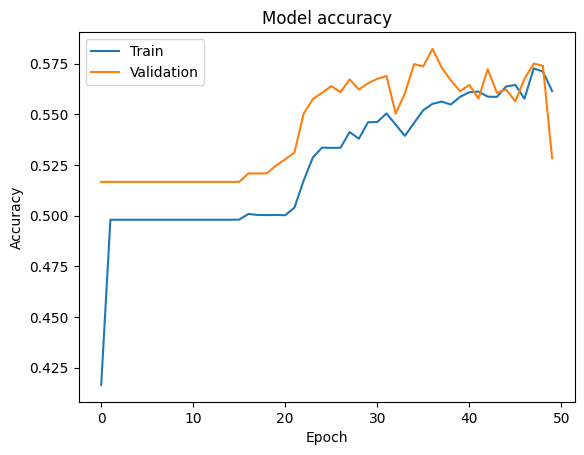

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Load future 



In [40]:
X_pred = pd.read_csv('../raw_data/final_merge/all_pa_future_values_2100.csv')
X_pred['quarter_start'] = pd.to_datetime(X_pred['quarter_start'])
X_pred.drop('lon', axis = 1, inplace = True)
X_pred.drop('lat', axis = 1, inplace = True)
X_pred

,SITECODE,quarter_start,temperature_quarterly_mean,precipitation_quarterly_mean,water-vapor-pressure_quarterly_mean,cloud-cover_quarterly_mean
0,IT5320009,2025-01-01,8.65,1.178506e-08,650.85570,0.500273
1,IT4050014,2025-01-01,5.11,1.629546e-08,606.74290,0.544266
2,IT4060015,2025-01-01,7.75,9.604958e-09,666.82480,0.515485
3,IT5330008,2025-01-01,2.14,2.546247e-08,538.16170,0.572809
4,IT4080001,2025-01-01,4.39,2.139190e-08,592.76886,0.588862
...,...,...,...,...,...,...
200027,IT4050013,2100-10-01,10.01,3.722503e-08,774.13670,0.603561
200028,IT4030002,2100-10-01,8.32,5.366960e-08,749.49335,0.646030
200029,IT4030003,2100-10-01,8.32,5.366960e-08,749.49335,0.646030
200030,IT4020017,2100-10-01,10.46,3.412798e-08,781.61035,0.575535


In [41]:
X_pred_10 = X_pred[X_pred['quarter_start'] < pd.to_datetime('2035-01-01')]
X_pred_20 = X_pred[X_pred['quarter_start'] < pd.to_datetime('2045-01-01')]
X_pred_50 = X_pred[X_pred['quarter_start'] < pd.to_datetime('2075-01-01')]

In [42]:
X_pred_10

,SITECODE,quarter_start,temperature_quarterly_mean,precipitation_quarterly_mean,water-vapor-pressure_quarterly_mean,cloud-cover_quarterly_mean
0,IT5320009,2025-01-01,8.65,1.178506e-08,650.85570,0.500273
1,IT4050014,2025-01-01,5.11,1.629546e-08,606.74290,0.544266
2,IT4060015,2025-01-01,7.75,9.604958e-09,666.82480,0.515485
3,IT5330008,2025-01-01,2.14,2.546247e-08,538.16170,0.572809
4,IT4080001,2025-01-01,4.39,2.139190e-08,592.76886,0.588862
...,...,...,...,...,...,...
26315,IT4050013,2034-10-01,10.08,2.917900e-08,741.69110,0.590514
26316,IT4030002,2034-10-01,8.28,4.791756e-08,724.01850,0.646825
26317,IT4030003,2034-10-01,8.28,4.791756e-08,724.01850,0.646825
26318,IT4020017,2034-10-01,10.55,2.417310e-08,764.57806,0.573639


In [ ]:
X_pred_10['quarter_start'] = pd.to_datetime(X_pred_10['quarter_start'], errors='coerce')
grouped = X_pred_10.groupby('SITECODE')
num_quarters = grouped.size().max()
X_pred_10 = X_pred_10.sort_values(by=['SITECODE', 'quarter_start'])


In [50]:
import numpy as np

# Define the number of sitecodes and quarters
num_sitecodes = 624
num_quarters = 40
num_features = 4

# Create an empty array to store the reshaped data
X_pred_10_reshaped = np.zeros((num_sitecodes, num_quarters, num_features))

# Iterate over each sitecode
for i, sitecode in enumerate(range(num_sitecodes)):
    # Assuming X_pred_10 contains data for all sitecodes
    site_data = X_pred_10[X_pred_10['SITECODE'] == sitecode].iloc[:, 2:].values  # Exclude 'SITECODE' and 'quarter_start'
    if site_data.shape[0] <= num_quarters:
        X_pred_10_reshaped[i, :site_data.shape[0], :] = site_data
    else:
        X_pred_10_reshaped[i, :, :] = site_data[:num_quarters, :]

# Check the shape of the reshaped array
print(X_pred_10_reshaped.shape)  # Output: (number of protected areas, number of quarters, number of features)

(624, 40, 4)
